# Deutsch-Jozsa's quantum approach

## I - Import important packages

In [35]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram

## II - Class for DJ algorithm

In [168]:
class DeutschJozsa:
    '''
    Class to generate a DeutschJozsa object containing:
    - init functions
    - oracle function 
    - dj function 
    '''
    def __init__(self, case, input_str):
        '''
        Initialization of the object:
        @case: (str) type of oracle balanced or constant
        @input_str: (str) string input state values 
        '''
        self.case = case
        self.number_qubit = len(input_str)
        self.str_input = input_str
        
    def oracle(self):
        '''
        Will create the oracle needed for the Deutsch-Jozsa algorithm
        No input, the function will be used in the dj function
        @return the oracle in form of a gate
        '''
        # Create the QuantumCircuit with n+1 qubits  
        self.oracle_circuit = QuantumCircuit(self.number_qubit+1)
        
        # Balanced case
        if self.case == "balanced":
            # apply an X-gate to a qubit when its value is 1
            for qubit in range(len(self.str_input)):
                if self.str_input[qubit] == '1':
                    self.oracle_circuit.x(qubit)
            # Apply CNOT gates on each qubit
            for qubit in range(self.number_qubit):
                self.oracle_circuit.cx(qubit, self.number_qubit)
            # apply another set of X gates when the input qubit == 1
            for qubit in range(len(self.str_input)):
                if self.str_input[qubit] == '1':
                    self.oracle_circuit.x(qubit)
            
        # Constant case
        if self.case == "constant":
        # Output 0 for a constant oracle
            self.output = np.random.randint(2)
            if self.output == 1:
                self.oracle_circuit.x(self.number_qubit)
        # convert the quantum circuit into a gate
        self.oracle_gate = self.oracle_circuit.to_gate()
        # name of the oracle
        self.oracle_gate.name = "Oracle" 
        return self.oracle_gate
        
    def dj(self):
        '''
        Create the Deutsch-Jozsa algorithm in the general case with n qubit
        No input
        @return the quantum circuit of the DJ 
        '''
        self.dj_circuit = QuantumCircuit(self.number_qubit+1, self.number_qubit)
        # Set up the output qubit:
        self.dj_circuit.x(self.number_qubit)
        self.dj_circuit.h(self.number_qubit)
        # Psi_0
        for qubit in range(self.number_qubit):
            self.dj_circuit.h(qubit)
        # Psi_1 + oracle 
        self.dj_circuit.append(self.oracle(), range(self.number_qubit+1))
        # Psi_2
        for qubit in range(self.number_qubit):
            self.dj_circuit.h(qubit)
        # Psi_3
        # Let's put some measurement 
        for i in range(self.number_qubit):
            self.dj_circuit.measure(i, i)

        return self.dj_circuit


## III - Visualize the quantum circuit

Create the quantum cricuit and visualize it

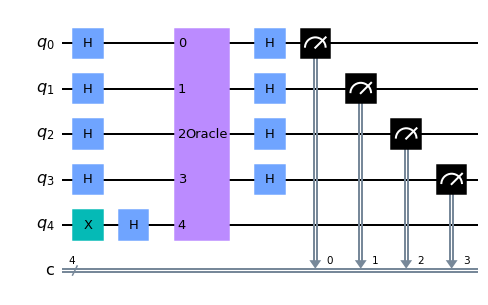

In [169]:
test = DeutschJozsa('constant', '0110')
#circuit = test.oracle()
dj_circuit = test.dj()
dj_circuit.draw('mpl')

## IV - Run the quantum circuit

Have some fun and run it on a quantum simulator

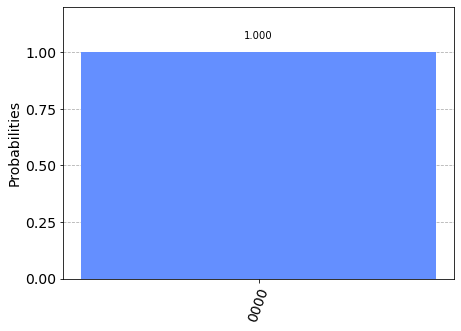

In [170]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_dj_circuit = transpile(dj_circuit, qasm_sim)
qobj = assemble(transpiled_dj_circuit)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

And now... Let's do it again but with a real device!

## V - Run on a real device

### Load and use your IBMQ account

In [157]:
from qiskit import IBMQ
#TOKEN = 'paste your token here'
#IBMQ.save_account(TOKEN)
IBMQ.load_account() # Load account from disk
IBMQ.providers()  

ibmqfactory.load_account:WARNING:2022-04-30 22:44:56,828: Credentials are already in use. The existing account in the session will be replaced.


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

### List the backends available in the IBM quantum Cloud

In [158]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

### Filter for devices with more or equal to 5 qubits

In [159]:
provider.backends(filters=lambda x: x.configuration().n_qubits >= 5
                                    and not x.configuration().simulator
                                    and x.status().operational==True)

[<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

### Load Manila device as backend

In [160]:
backend = provider.get_backend('ibmq_manila')
backend

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

### Run on Manila 

In [161]:
mapped_circuit = transpile(dj_circuit, backend=backend)
qobj = assemble(mapped_circuit, backend=backend, shots=1024)
job = backend.run(qobj)

/var/folders/pl/5fwxfdqn4ns4gmyg5c4pfgh40000gp/T/ipykernel_32770/1129222619.py:3: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


### Check the job's status

In [164]:
job.status() # 9:17 pm

<JobStatus.DONE: 'job has successfully run'>

### Get the results

In [165]:
result = job.result()
counts = result.get_counts()
print(counts)

{'0000': 974, '0001': 8, '0010': 8, '0100': 25, '1000': 8, '1001': 1}


### Visualize the probabilities with an histogram

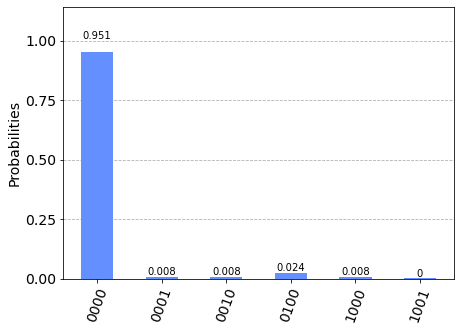

In [167]:
plot_histogram(counts)

### Save the pictures

In [166]:
plot_histogram(counts,figsize=(10,8), filename='DJ.jpeg')